In [167]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [168]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

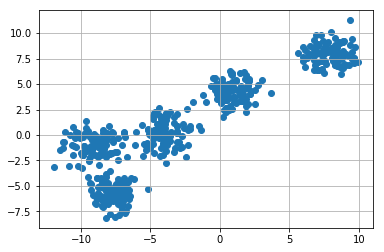

In [169]:
plt.figure(0)
plt.grid()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [170]:

k = 5

color  = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    print(center)
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster
print(clusters)

[7.56169676 0.39356149]
[ 9.10174392 -1.14876368]
[-1.30758699 -5.8121071 ]
[-9.61990565  0.87114317]
[-6.79118785 -9.49597307]
{0: {'center': array([7.56169676, 0.39356149]), 'points': [], 'color': 'green'}, 1: {'center': array([ 9.10174392, -1.14876368]), 'points': [], 'color': 'red'}, 2: {'center': array([-1.30758699, -5.8121071 ]), 'points': [], 'color': 'blue'}, 3: {'center': array([-9.61990565,  0.87114317]), 'points': [], 'color': 'yellow'}, 4: {'center': array([-6.79118785, -9.49597307]), 'points': [], 'color': 'orange'}}


In [171]:
clusters

{0: {'center': array([7.56169676, 0.39356149]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 9.10174392, -1.14876368]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-1.30758699, -5.8121071 ]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-9.61990565,  0.87114317]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-6.79118785, -9.49597307]),
  'points': [],
  'color': 'orange'}}

In [172]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [173]:
v1=np.array([1,2])
v2=np.array([3,5])
distance(v1,v2)

3.605551275463989

In [174]:
def assignPointToClusters(clusters):  #E-step
    for ix in range(X.shape[0]):
        dist=[]
        curr_x=X[ix]   #current point

        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])

            dist.append(d)
        current_cluster=np.argmin(dist)

        clusters[current_cluster]['points'].append(curr_x)

In [175]:
def updateClusters(clusters):    #M-Step
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if(pts.shape[0]>0):
            new_u=pts.mean(axis=0)
            
            clusters[kx]['center']=new_u
            clusters[kx]['points']=[]  #clear the list


In [176]:
def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts=np.array(clusters[kx]['points'])
        
        #print(pts)
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
            
        except:
            pass
        
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
        
        
        

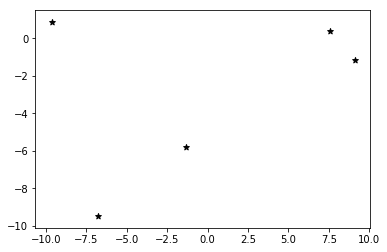

In [177]:
plotClusters((clusters))

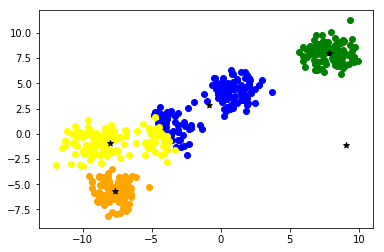

In [187]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [162]:
# Assign every data point to one of the clusters
def assignPointToClusters1(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        #clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters1(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if (pts.shape[0]>0): #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters1(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

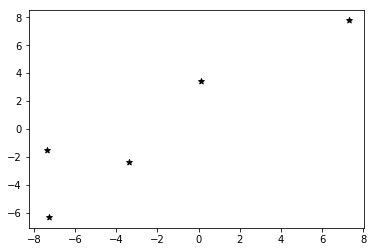

In [163]:
plotClusters(clusters)

(0,)
(0,)
(0,)
(0,)
(0,)


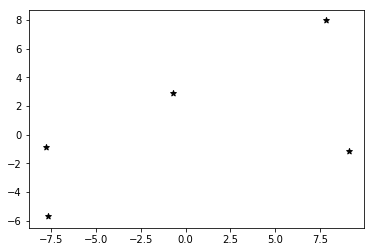

In [189]:
# Repeat this cell few times or put it inside a loop
assignPointToClusters1(clusters)
plotClusters1(clusters)
updateClusters1(clusters)